In [1]:
!pip install mysql-connector-python

In [2]:
#importing matplot
import matplotlib.pyplot as plt 

#importing numpy
import numpy as np 

# Set plot space as inline for inline plots display
%matplotlib inline

In [27]:
# importing pandas into jupyter notebook
import pandas as pd
#importing SQL connector
import mysql.connector

con = mysql.connector.connect(user='hbs-student', password='super-secure-password?',
                              host='hbs-ds-060120.c1doesqrid0e.us-east-1.rds.amazonaws.com',
                              database='movies')

In [28]:
#importing Box office database
# box_m = pd.read_sql_query('select * from bom_movie_gross', con)
df = pd.read_sql_query("""
                         SELECT  title, studio, bom_movie_gross.domestic_gross, 
                                 foreign_gross, year, tconst, runtime_minutes, genres, 
                                 averagerating, numvotes, directors, writers, production_budget
                         FROM movies.bom_movie_gross
                         JOIN imdb_title_basics
                         ON title = primary_title
                         JOIN imdb_title_ratings
                         USING (tconst)
                         JOIN imdb_title_crew
                         USING (tconst)
                         JOIN tn_movie_budgets
                         ON title = movie;
                         """, con)


In [29]:
df.head()

,title,studio,domestic_gross,foreign_gross,year,tconst,runtime_minutes,genres,averagerating,numvotes,directors,writers,production_budget
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,103.0,"Adventure,Animation,Comedy",8.3,682218,nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335","$200,000,000"
1,Inception,WB,292600000.0,535700000.0,2010,tt1375666,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,nm0634240,nm0634240,"$160,000,000"
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,tt0892791,93.0,"Adventure,Animation,Comedy",6.3,167532,nm0593610,"nm0825308,nm0458441,nm0501359,nm0011470,nm0254...","$165,000,000"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,tt1325004,124.0,"Adventure,Drama,Fantasy",5.0,211733,nm1720541,"nm0742279,nm2769412","$68,000,000"
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,tt1228705,124.0,"Action,Adventure,Sci-Fi",7.0,657690,nm0269463,"nm0857620,nm0498278,nm1411347,nm1293367,nm0456158","$170,000,000"


In [30]:
st_do = df.groupby('studio').sum()
st_do = st_do.domestic_gross.sort_values(ascending=False)
st_do = st_do.head(15)
st_do.reset_index()

,studio,domestic_gross
0,BV,1.582090e+10
1,Uni.,1.375708e+10
2,WB,1.149680e+10
3,Fox,1.061380e+10
4,Sony,7.375000e+09
5,Par.,6.609400e+09
6,WB (NL),4.190700e+09
7,LGF,3.431073e+09
8,P/DW,1.682900e+09
9,Wein.,1.450375e+09


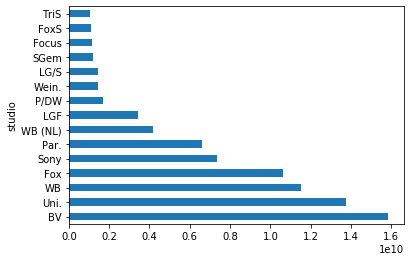

In [31]:
st_do.plot(x='studio', y = ['domestic_gross'], kind = 'barh')
plt.show()